## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:

model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 10s 199us/step - loss: 2.2775 - acc: 0.1635 - val_loss: 2.2174 - val_acc: 0.2164
Epoch 2/500
50000/50000 [==============================] - 4s 85us/step - loss: 2.1848 - acc: 0.2395 - val_loss: 2.1557 - val_acc: 0.2568
Epoch 3/500
50000/50000 [==============================] - 4s 86us/step - loss: 2.1303 - acc: 0.2654 - val_loss: 2.1076 - val_acc: 0.2767
Epoch 4/500
50000/50000 [==============================] - 4s 85us/step - loss: 2.0872 - acc: 0.2799 - val_loss: 2.0684 - val_acc: 0.2863
Epoch 5/500
50000/50000 [==============================] - 4s 82us/step - loss: 2.0512 - acc: 0.2913 - val_loss: 2.0352 - val_acc: 0.2990
Epoch 6/500
50000/50000 [==============================] - 4s 80us/step - loss: 2.0198 - acc: 0.3008 - val_loss: 2.0061 - val_acc: 0.3087
Epoch 7/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.9926 - acc: 0.3089 - val_loss: 1.9812 

50000/50000 [==============================] - 4s 82us/step - loss: 1.6565 - acc: 0.4253 - val_loss: 1.6662 - val_acc: 0.4176
Epoch 60/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.6533 - acc: 0.4241 - val_loss: 1.6635 - val_acc: 0.4169
Epoch 61/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.6507 - acc: 0.4252 - val_loss: 1.6593 - val_acc: 0.4208
Epoch 62/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.6477 - acc: 0.4276 - val_loss: 1.6574 - val_acc: 0.4202
Epoch 63/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.6448 - acc: 0.4269 - val_loss: 1.6549 - val_acc: 0.4215
Epoch 64/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.6419 - acc: 0.4286 - val_loss: 1.6538 - val_acc: 0.4225
Epoch 65/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.6395 - acc: 0.4305 - val_loss: 1.6470 - val_acc: 0.4234
Epoch 66/500
50000/50000 [==============

50000/50000 [==============================] - 5s 100us/step - loss: 1.5207 - acc: 0.4721 - val_loss: 1.5450 - val_acc: 0.4585
Epoch 118/500
50000/50000 [==============================] - 4s 82us/step - loss: 1.5181 - acc: 0.4722 - val_loss: 1.5435 - val_acc: 0.4590
Epoch 119/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.5169 - acc: 0.4730 - val_loss: 1.5411 - val_acc: 0.4601
Epoch 120/500
50000/50000 [==============================] - 5s 91us/step - loss: 1.5148 - acc: 0.4722 - val_loss: 1.5463 - val_acc: 0.4576
Epoch 121/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.5130 - acc: 0.4728 - val_loss: 1.5410 - val_acc: 0.4588
Epoch 122/500
50000/50000 [==============================] - 4s 83us/step - loss: 1.5113 - acc: 0.4741 - val_loss: 1.5402 - val_acc: 0.4617
Epoch 123/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.5095 - acc: 0.4740 - val_loss: 1.5364 - val_acc: 0.4576
Epoch 124/500
50000/50000 [====

50000/50000 [==============================] - 18s 354us/step - loss: 1.4222 - acc: 0.5061 - val_loss: 1.4724 - val_acc: 0.4769
Epoch 176/500
50000/50000 [==============================] - 24s 479us/step - loss: 1.4203 - acc: 0.5055 - val_loss: 1.4733 - val_acc: 0.4803
Epoch 177/500
50000/50000 [==============================] - 23s 456us/step - loss: 1.4193 - acc: 0.5047 - val_loss: 1.4761 - val_acc: 0.4801
Epoch 178/500
50000/50000 [==============================] - 17s 333us/step - loss: 1.4174 - acc: 0.5059 - val_loss: 1.4759 - val_acc: 0.4796
Epoch 179/500
50000/50000 [==============================] - 25s 503us/step - loss: 1.4162 - acc: 0.5068 - val_loss: 1.4709 - val_acc: 0.4753
Epoch 180/500
50000/50000 [==============================] - 21s 424us/step - loss: 1.4148 - acc: 0.5073 - val_loss: 1.4700 - val_acc: 0.4806
Epoch 181/500
50000/50000 [==============================] - 22s 430us/step - loss: 1.4129 - acc: 0.5074 - val_loss: 1.4655 - val_acc: 0.4832
Epoch 182/500
50000/

Epoch 233/500
50000/50000 [==============================] - 4s 86us/step - loss: 1.3372 - acc: 0.5328 - val_loss: 1.4227 - val_acc: 0.4945
Epoch 234/500
50000/50000 [==============================] - 6s 115us/step - loss: 1.3362 - acc: 0.5347 - val_loss: 1.4286 - val_acc: 0.4925
Epoch 235/500
50000/50000 [==============================] - 6s 111us/step - loss: 1.3345 - acc: 0.5353 - val_loss: 1.4264 - val_acc: 0.4909
Epoch 236/500
50000/50000 [==============================] - 5s 107us/step - loss: 1.3329 - acc: 0.5345 - val_loss: 1.4284 - val_acc: 0.4932
Epoch 237/500
50000/50000 [==============================] - 4s 88us/step - loss: 1.3318 - acc: 0.5352 - val_loss: 1.4236 - val_acc: 0.4948
Epoch 238/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.3304 - acc: 0.5373 - val_loss: 1.4173 - val_acc: 0.4929
Epoch 239/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.3295 - acc: 0.5362 - val_loss: 1.4183 - val_acc: 0.4962
Epoch 240/500
5

50000/50000 [==============================] - 4s 78us/step - loss: 1.2626 - acc: 0.5593 - val_loss: 1.3871 - val_acc: 0.5039
Epoch 292/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.2620 - acc: 0.5608 - val_loss: 1.3873 - val_acc: 0.5041
Epoch 293/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.2604 - acc: 0.5609 - val_loss: 1.3884 - val_acc: 0.5079
Epoch 294/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.2594 - acc: 0.5604 - val_loss: 1.3967 - val_acc: 0.5037
Epoch 295/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.2579 - acc: 0.5607 - val_loss: 1.3918 - val_acc: 0.5040
Epoch 296/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.2564 - acc: 0.5625 - val_loss: 1.3950 - val_acc: 0.4997
Epoch 297/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.2558 - acc: 0.5619 - val_loss: 1.3847 - val_acc: 0.5031
Epoch 298/500
50000/50000 [=======

50000/50000 [==============================] - 4s 82us/step - loss: 1.1966 - acc: 0.5826 - val_loss: 1.3572 - val_acc: 0.5201
Epoch 350/500
50000/50000 [==============================] - 4s 84us/step - loss: 1.1952 - acc: 0.5846 - val_loss: 1.4483 - val_acc: 0.4875
Epoch 351/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.1947 - acc: 0.5831 - val_loss: 1.3714 - val_acc: 0.5122
Epoch 352/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.1924 - acc: 0.5850 - val_loss: 1.3574 - val_acc: 0.5169
Epoch 353/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.1906 - acc: 0.5842 - val_loss: 1.3517 - val_acc: 0.5179
Epoch 354/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.1897 - acc: 0.5839 - val_loss: 1.3588 - val_acc: 0.5169
Epoch 355/500
50000/50000 [==============================] - 4s 77us/step - loss: 1.1890 - acc: 0.5862 - val_loss: 1.3575 - val_acc: 0.5174
Epoch 356/500
50000/50000 [=======

50000/50000 [==============================] - 6s 123us/step - loss: 1.1326 - acc: 0.6068 - val_loss: 1.3411 - val_acc: 0.5214
Epoch 408/500
50000/50000 [==============================] - 6s 116us/step - loss: 1.1314 - acc: 0.6061 - val_loss: 1.4020 - val_acc: 0.5022
Epoch 409/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1299 - acc: 0.6061 - val_loss: 1.3339 - val_acc: 0.5252
Epoch 410/500
50000/50000 [==============================] - 6s 112us/step - loss: 1.1298 - acc: 0.6062 - val_loss: 1.3853 - val_acc: 0.5097
Epoch 411/500
50000/50000 [==============================] - 23s 462us/step - loss: 1.1272 - acc: 0.6071 - val_loss: 1.3407 - val_acc: 0.5259
Epoch 412/500
50000/50000 [==============================] - 27s 530us/step - loss: 1.1271 - acc: 0.6081 - val_loss: 1.3587 - val_acc: 0.5126
Epoch 413/500
50000/50000 [==============================] - 25s 503us/step - loss: 1.1256 - acc: 0.6089 - val_loss: 1.3441 - val_acc: 0.5240
Epoch 414/500
50000/5000

Epoch 465/500
50000/50000 [==============================] - 19s 388us/step - loss: 1.0721 - acc: 0.6273 - val_loss: 1.3442 - val_acc: 0.5286
Epoch 466/500
50000/50000 [==============================] - 24s 483us/step - loss: 1.0712 - acc: 0.6283 - val_loss: 1.4031 - val_acc: 0.5082
Epoch 467/500
50000/50000 [==============================] - 22s 449us/step - loss: 1.0689 - acc: 0.6291 - val_loss: 1.3473 - val_acc: 0.5216
Epoch 468/500
50000/50000 [==============================] - 22s 448us/step - loss: 1.0682 - acc: 0.6290 - val_loss: 1.3580 - val_acc: 0.5255
Epoch 469/500
50000/50000 [==============================] - 22s 448us/step - loss: 1.0682 - acc: 0.6279 - val_loss: 1.3452 - val_acc: 0.5272
Epoch 470/500
50000/50000 [==============================] - 23s 461us/step - loss: 1.0655 - acc: 0.6291 - val_loss: 1.3582 - val_acc: 0.5182
Epoch 471/500
50000/50000 [==============================] - 21s 429us/step - loss: 1.0648 - acc: 0.6302 - val_loss: 1.3316 - val_acc: 0.5302
Epoch 

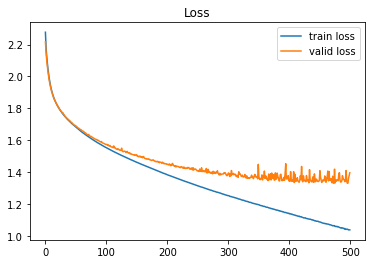

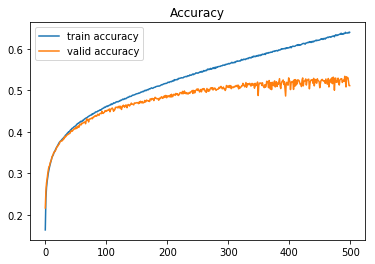

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()